# ZUBER (Empresa de viajes compartidos en Chicago) EDA

#### Objetivo :  Encontrar patrones en la información que nos permitan comprender las preferencias de los pasajeros y el impacto de los factores externos (como el clima) en los viajes.

#### 1.- Cargar datos y Exploracion 

In [1]:
"""
Este bloque de código:
- Importa librerías
- Carga los CSV
- Muestra información general
- Realiza un vistazo rápido de los datos
"""
#importar librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df _companies contiene : company_name: nombre de la empresa de taxis
# y trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 
df_companies = pd.read_csv("/datasets/project_sql_result_01.csv")
#df_neighborhoods contiene: dropoff_location_name: barrios de Chicago donde finalizaron los viajes
#  y average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
df_neighborhoods = pd.read_csv("/datasets/project_sql_result_04.csv")
#df_loop_Hare contiene:start_ts: fecha y hora de la recogida,
#weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje: BAD (RAIN/STORM) GOOD (OTHER)
# y duration_seconds: duración del viaje en segundos
df_Loop_Hare = pd.read_csv("/datasets/project_sql_result_07.csv")

# Mostrar las primeras filas,e info para inspeccionar
print("Datos de empresas de taxis:")
print(df_companies.head())
print(df_companies.info())

print("\nDatos de barrios:")
print(df_neighborhoods.head())
print(df_neighborhoods.info())

print("\nDatos de viajes Loop-O'Hare:")
print(df_Loop_Hare.head())
print(df_Loop_Hare.info())

Datos de empresas de taxis:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Datos de barrios:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns)

In [2]:
# Convertir start_ts a datetime
df_Loop_Hare['start_ts'] = pd.to_datetime(df_Loop_Hare['start_ts'])
# Convertir duration_seconds a int (redondeando los valores)
df_Loop_Hare['duration_seconds'] = df_Loop_Hare['duration_seconds'].astype(int)
# Revisar cambios
print(df_Loop_Hare.dtypes)

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds               int64
dtype: object


#### Comentarios > Tras revisar los datasets, podemos concluir que:

El dataframe de empresas de taxis contiene 64 registros y las columnas company_name y trips_amount presentan tipos de datos correctos (object y int64, respectivamente) y no hay valores nulos. 
El dataframe de barrios contiene 94 registros y las columnas dropoff_location_name y average_trips presentan tipos de datos correctos (object y float64) y tampoco tienen valores nulos. 

En general, ambos datasets son consistentes con la descripción de los datos y están preparados para el análisis exploratorio más detallado. 


Respecto al dataframe de viajes Loop-O'Hare que contiene 1,068 registros sin valores nulos, se realizaron algunos cambios de tipo de dato:
start_ts: convertir a tipo de datos datetime para facilitar filtrado por fecha, hora o día de la semana.
duration_seconds: si no necesitamos precisión en decimales (segundos exactos), lo convertiremos a int para simplificar y hacer los cálculos.

#### 2.-Duplicados de datos 

In [3]:
#Revisar si hay filas duplicadas completas
print("Número de filas duplicadas para df_companies:", df_companies.duplicated().sum())
print("Número de filas duplicadas para df_neighborhoods:", df_neighborhoods.duplicated().sum())
print("Número de filas duplicadas para df_Loop_Hare:", df_Loop_Hare.duplicated().sum())

Número de filas duplicadas para df_companies: 0
Número de filas duplicadas para df_neighborhoods: 0
Número de filas duplicadas para df_Loop_Hare: 197


In [4]:
#Mostrar duplicados 
#print(df_Loop_Hare[df_Loop_Hare.duplicated()])
# Mostrar todos los registros que se repiten, incluyendo la primera aparición

#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

print(df_Loop_Hare[df_Loop_Hare.duplicated(keep=False)])


                start_ts weather_conditions  duration_seconds
4    2017-11-11 07:00:00               Good              1440
8    2017-11-11 14:00:00               Good              2460
10   2017-11-18 06:00:00               Good              1500
16   2017-11-04 12:00:00               Good              2640
23   2017-11-04 14:00:00               Good              3360
...                  ...                ...               ...
1054 2017-11-11 07:00:00               Good              1380
1058 2017-11-25 12:00:00               Good              1440
1062 2017-11-11 06:00:00               Good              1500
1065 2017-11-11 13:00:00               Good              2100
1066 2017-11-11 08:00:00               Good              1380

[312 rows x 3 columns]


#### Comentarios > 
Tras revisar los duplicados podemos observar que existen 197 para el dataframe df_Loop_Hare. Sin embargo, no se eliminarán estas filas del dataframe considerando que cada fila representa un viaje único y que éstos duplicados que pandas detecta son solo coincidencias parciales y no duplicados exactos 

#### 3.- Análisis de Datos 

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


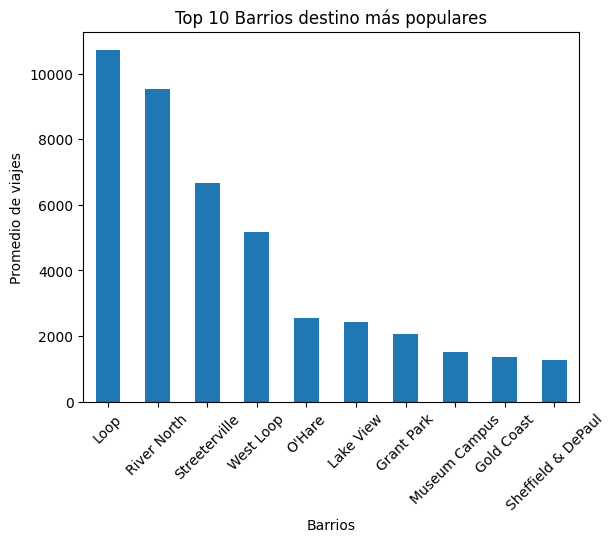

In [5]:
#Barrios destino más populares del 15 y 16 de noviembre 2017 

# Ordenar el dataframe por la columna 'average_trips' de mayor a menor
popular_barrios = df_neighborhoods.sort_values(by='average_trips', ascending=False)
# Mostrar los 10 primeros registros
top10 = popular_barrios.head(10)
#top20 = popular_barrios.head(20)
print(top10)
#print('/n')
#print(top20)

top10.plot(kind= 'bar', x='dropoff_location_name', y='average_trips', title='Top 10 Barrios destino más populares',
       xlabel ='Barrios', ylabel='Promedio de viajes', legend = False)
plt.xticks(rotation=45)
plt.show()

#### Conclusión: Barrios con mayor promedio de finalizaciones de viaje

El barrio de Loop destaca como el principal destino, con un promedio de más de 10,700 viajes, seguido por River North y Streeterville. Otros barrios como West Loop y O’Hare también presentan un volumen significativo de viajes.

En general, los diez barrios principales concentran una parte importante de las finalizaciones de viaje, lo que indica que la demanda de taxis se enfoca posiblemente en áreas centrales y/o puntos de interés turistico, etc.

In [6]:
#Empresas de taxis más solicitadas del 15 y 16 de noviembre 2017 

# Ordenar el dataframe por la columna 'trips_amount' de mayor a menor
popular_companies = df_companies.sort_values(by='trips_amount', ascending=False)
#Adicional : Calcular porcentaje de los viajes 
popular_companies['porcentaje'] = (popular_companies['trips_amount'] /popular_companies['trips_amount'].sum())* 100
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
print(popular_companies)

                       company_name  trips_amount  porcentaje
0                         Flash Cab         19558   14.243578
1         Taxi Affiliation Services         11422    8.318343
2                 Medallion Leasing         10367    7.550014
3                        Yellow Cab          9888    7.201171
4   Taxi Affiliation Service Yellow          9299    6.772218
..                              ...           ...         ...
59     4053 - 40193 Adwar H. Nikola             7    0.005098
60          2733 - 74600 Benny Jona             7    0.005098
61    5874 - 73628 Sergey Cab Corp.             5    0.003641
62       2241 - 44667 - Felman Corp             3    0.002185
63      3556 - 36214 RC Andrews Cab             2    0.001457

[64 rows x 3 columns]


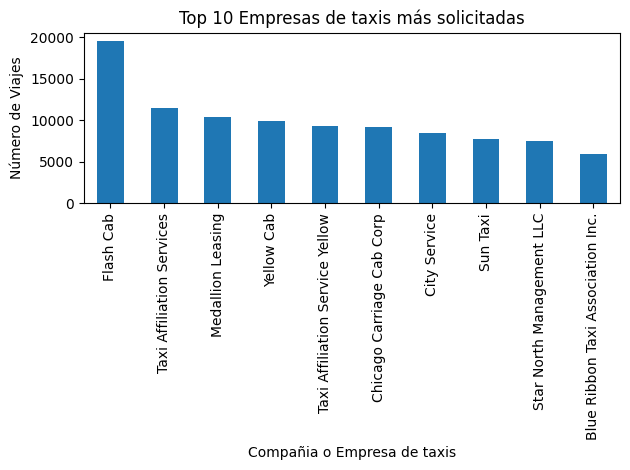

<Figure size 1000x600 with 0 Axes>

<Figure size 800x800 with 0 Axes>

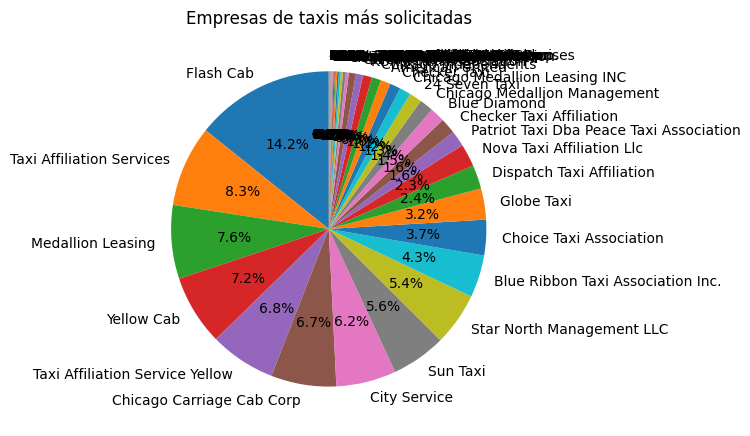

In [7]:
# Graficar las 10 primeras empresas con más viajes
top10_companies = popular_companies.head(10)
top10_companies.plot(kind= 'bar', x='company_name', y='trips_amount', title='Top 10 Empresas de taxis más solicitadas',
       xlabel ='Compañia o Empresa de taxis', ylabel='Número de Viajes', legend = False)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.figure(figsize=(10, 6))
plt.show()

# Graficar el % de viajes para cada empresa de taxis
plt.figure(figsize=(8, 8))

popular_companies.plot(kind='pie',y='porcentaje', labels=popular_companies['company_name'],
                       autopct='%1.1f%%', startangle=90,legend=False)
plt.title('Empresas de taxis más solicitadas')
plt.ylabel('')  # Quita el label automático del eje Y
plt.tight_layout()
plt.show()

#### Conclusión: Empresas de taxis más solicitadas 

El análisis muestra que el mercado de taxis en Chicago es altamente competitivo, con un gran número de empresas participando en la oferta de servicios. Sin embargo, algo tiene Flash Cab que lo hace la empresa de taxis más solicitada.

Flash Cab se posiciona como la empresa líder, concentrando aproximadamente 14.2% del total de viajes, lo que la convierte en la compañía más solicitada durante el periodo analizado. Le siguen Taxi Affiliation Services (8.3%) y Medallion Leasing (7.6%), aunque con una diferencia considerable respecto al primer lugar.

A partir de la cuarta posición, la distribución de los viajes se vuelve más homogénea, con varias empresas que concentran porcentajes similares.

Además, se observan muchas  empresas con demanda menor o muy baja, muchas de ellas con menos del 1% del total de viajes.

En conjunto, estos resultados sugieren que, aunque existe una empresa dominante, la mayoría de los viajes se distribuyen entre múltiples compañías, lo que refleja un entorno competitivo y diversificado en el sector de taxis de Chicago.

#### 4.- Prueba de hipótesis 

Ho: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es "igual" o no cambia/difiere entre los sábados lluviosos y los sábados con buenas condiciones climáticas (Es decir, el clima no tiene impacto en la duración promedio de los viajes).

Ha: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia o es diferente entre los sábados lluviosos y los sábados con buenas condiciones climáticas. (Es decir, el clima sí influye en la duración promedio de los viajes).

Se estableció un nivel de significación α = 0.05, ya que es un valor comúnmente utilizado en análisis estadísticos

Dado que se compararán las duraciones de los viajes en dos grupos independientes:
Grupo 1:Viajes realizados en sábados con condiciones climáticas adversas (Bad).
Grupo 2:Viajes realizados en sábados con condiciones climáticas favorables (Good).

Se utilizó una prueba estadística de comparación de medias(Prueba de hipótesis de 2 colas: Prueba t de Student para muestras independientes / Independent two-sample t-test: Welch’s t-test) para determinar si existe una diferencia significativa entre ambos grupos. 

El criterio de decisión es :
Si el valor p obtenido es menor que α = 0.05, se rechaza la hipótesis nula.
Si el valor p es mayor o igual a 0.05, no se rechaza la hipótesis nula.


In [11]:
from scipy import stats as st
#Obtener grupos de datos 
good_weather = df_Loop_Hare[df_Loop_Hare['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = df_Loop_Hare[df_Loop_Hare['weather_conditions'] == 'Bad']['duration_seconds']
#Explorar grupos 
print('Good weather:')
print('Cantidad (n=):', len(good_weather))
print('Duración promedio:', good_weather.mean())

print('\nBad weather:')
print('Cantidad (n=):', len(bad_weather))
print('Duración promedio:', bad_weather.mean())

Good weather:
Cantidad (n=): 888
Duración promedio: 1999.6756756756756

Bad weather:
Cantidad (n=): 180
Duración promedio: 2427.2055555555557


In [23]:
#Prueba estadística 
alpha = 0.05
#t_stat, p_value = st.ttest_ind(good_weather,bad_weather, equal_var=False)
result = st.ttest_ind(good_weather,bad_weather, equal_var=True)

print('Valor p:', result.pvalue)
if (result.pvalue < alpha):
    print('Rechazamos la Hipótesis Nula.La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional OHare cambia o es diferente entre los sábados lluviosos y los sábados con buenas condiciones climáticas')
else: 
    print('Se acepta la hipótesis Nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional OHare es igual o no cambia/difiere entre los sábados lluviosos y los sábados con buenas condiciones climáticas')

Valor p: 6.517970327099473e-12
Rechazamos la Hipótesis Nula.La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional OHare cambia o es diferente entre los sábados lluviosos y los sábados con buenas condiciones climáticas


In [22]:
#Paso  extra : Verificar si las varianzas son diferentes 
#Obtener varianza muestral 
var_good = good_weather.var(ddof=1)  # ddof=1 v. de muestra
var_bad  = bad_weather.var(ddof=1)

print("Varianza buen clima:", var_good)
print("Varianza mal clima:", var_bad)

#Prueba de igualdad de varianzas : Levene
#Ho: las varianzas son iguales
#Ha: las varianzas son diferentes
# Prueba de Levene
stat, p_value = stats.levene(good_weather, bad_weather)
#print("Levene test statistic:", stat)
print("p-value:", p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos Ho: las varianzas son diferentes")
else:
    print("No se rechaza Ho: no hay evidencia de que las varianzas sean diferentes")


Varianza buen clima: 576382.009689509
Varianza mal clima: 520294.086002483
p-value: 0.5332038671974493
No se rechaza Ho: no hay evidencia de que las varianzas sean diferentes


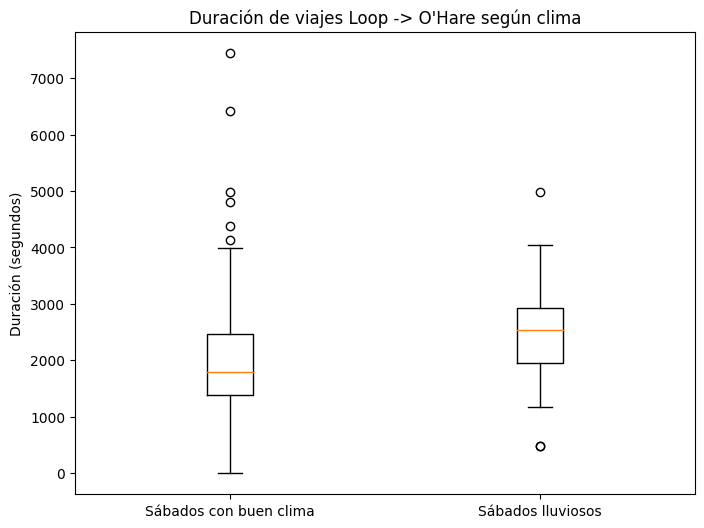

In [26]:
#GRÁFICO BOX PLOT
# Crear lista de datos
data = [good_weather, bad_weather]
# Boxplot
plt.figure(figsize=(8,6))
plt.boxplot(data, labels=['Sábados con buen clima', 'Sábados lluviosos'])
plt.title("Duración de viajes Loop -> O'Hare según clima")
plt.ylabel("Duración (segundos)")
plt.show()

#### Conclusión sobre la hipótesis

El análisis muestra que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare varía significativamente según las condiciones climáticas de los sábados:

Buen clima: n = 888 viajes, duración promedio = 1999.675 segundos

Sábados lluviosos: n = 180 viajes, duración promedio ≈ 2,427.2055 segundos

La prueba estadistica arrojó un valor p muy pequeño (6.52e-12), mucho menor que nuestro nivel de significancia α = 0.05. Por lo tanto:

Se rechazó la hipótesis nula (Ho) y se  acepta la hipótesis alterna (Ha): los sábados lluviosos generan un aumento significativo en la duración promedio de los viajes de Loop -> O’Hare.
También se observa que hay muchos más viajes los sábados con buen clima que los sábados lluviosos. Esto sugiere que la lluvia reduce la cantidad de viajes realizados.

En conjunto, los resultados muestran que la lluvia no solo reduce la cantidad de viajes, sino que también aumenta el tiempo de los viajes de Loop a O’Hare, evidenciando un impacto claro del clima en la movilidad de los taxis.
